In [84]:
import numpy as np
from numpy import genfromtxt

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from qiskit.tools.jupyter import *
from scipy.optimize import minimize
import matplotlib as mpl
import matplotlib.pylab as pylab
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import warnings

warnings.filterwarnings('ignore')

pi = np.pi
cos = np.cos
sin = np.sin
exp = np.exp
sqrt = np.sqrt

In [85]:
anharmonicity = 4581552617.648945 - 4.92517 * 1e9

In [86]:
def Z01(phi):
    return np.array([[exp(1j * phi), 0, 0],
                     [0, 1, 0],
                     [0, 0, 1]])


def Z12(phi):
    return np.array([[1, 0, 0],
                     [0, 1, 0],
                     [0, 0, exp(1j * phi)]])


def X01(theta):
    return np.array([[np.cos(theta / 2), -1j * np.sin(theta / 2), 0],
                     [-1j * np.sin(theta / 2), np.cos(theta / 2), 0],
                     [0, 0, 1]])


def X12(theta):
    return np.array([[1, 0, 0],
                     [0, np.cos(theta / 2), -1j * np.sin(theta / 2)],
                     [0, -1j * np.sin(theta / 2), np.cos(theta / 2)]])

def Y01(theta):
    return np.array([[np.cos(theta/2), -np.sin(theta/2), 0],
                     [np.sin(theta/2), np.cos(theta/2), 0],
                     [0, 0, 1]])

def Y12(theta):
    return np.array([[1, 0, 0],
                     [0, np.cos(theta/2), -np.sin(theta/2)],
                     [0, np.sin(theta/2), np.cos(theta/2)]])

def model_zero_population(alpha, n):
    # alpha are parameters of the model
    psi_init = [[1], [0], [0]]
    psi_final = Y01(pi/2) @ psi_init
    for i in range(8*n):
        psi_final = Z01(alpha) @ X12(pi/2) @ psi_final
    psi_final = Y01(-pi/2) @ psi_final
    return np.absolute(psi_final[0][0]) ** 2



In [97]:
j = 30
n = 1
model_zero_population(2*pi/NUM_SAMPLE*j, n)

0.6545084971874731

In [98]:
zero_population_exp[n]

0.3462

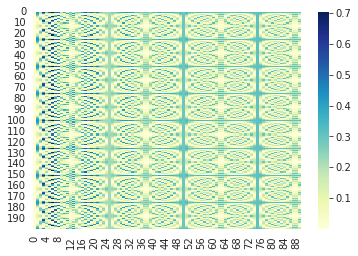

In [94]:
NUM_SAMPLE = 200
NUM_EXP = 90
job_id = '630b253ba7ff833063784070'
zero_population_exp = genfromtxt('ramsey_exp_data_' + job_id + '.csv', delimiter=",")[3:, 0]
square_error = np.zeros([NUM_SAMPLE, NUM_EXP])
for n in range(NUM_EXP):
    for j in range(NUM_SAMPLE):
        square_error[j, n] = (model_zero_population(2*pi/NUM_SAMPLE*j, n) - zero_population_exp[n]) ** 2
sns.heatmap(square_error, cmap="YlGnBu")
sns.set(rc={'figure.figsize':(10,10)})
plt.show()

In [92]:
zero_population_exp

array([0.91375, 0.3462 , 0.549  , 0.2116 , 0.4655 , 0.2702 , 0.16065,
       0.26285, 0.27865, 0.5677 , 0.3954 , 0.63835, 0.46125, 0.65315,
       0.4867 , 0.482  , 0.35215, 0.26465, 0.35075, 0.27565, 0.36485,
       0.32295, 0.45415, 0.5079 , 0.5267 , 0.5258 , 0.4895 , 0.48945,
       0.4158 , 0.3784 , 0.357  , 0.35195, 0.3653 , 0.36355, 0.43255,
       0.43895, 0.483  , 0.45735, 0.47115, 0.49675, 0.4297 , 0.4361 ,
       0.3788 , 0.41855, 0.40125, 0.4063 , 0.3992 , 0.421  , 0.44955,
       0.4359 , 0.45875, 0.42485, 0.4596 , 0.43325, 0.44595, 0.4205 ,
       0.4239 , 0.4259 , 0.42875, 0.4378 , 0.42985, 0.4438 , 0.4291 ,
       0.44005, 0.4386 , 0.4392 , 0.43675, 0.4376 , 0.4342 , 0.4361 ,
       0.4431 , 0.43345, 0.4332 , 0.4378 , 0.44305, 0.44235, 0.4349 ,
       0.44175, 0.44455, 0.4404 , 0.4407 , 0.4337 , 0.44225, 0.4423 ,
       0.43945, 0.4422 , 0.44235, 0.44935, 0.44395, 0.44445])